In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn import datasets, model_selection

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784')

5


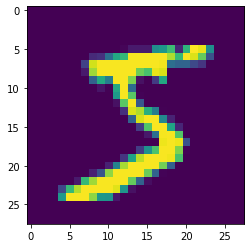

In [3]:
import numpy as np
data=np.array(mnist.data)/255
label=np.array(mnist.target)
plt.imshow(data[0].reshape(28,28))
print(label[0])

In [4]:
tx,vx,ty,vy=model_selection.train_test_split(data,label)

In [5]:
tx=torch.from_numpy(tx).float()
ty=torch.from_numpy(ty.astype(int)).long()
vx=torch.from_numpy(vx).float()
vy=torch.from_numpy(vy.astype(int)).long()

In [6]:
train=TensorDataset(tx,ty)
train_loader=DataLoader(train,batch_size=100,shuffle=True)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,256)
        self.fc3=nn.Linear(256,256)
        self.fc4=nn.Linear(256,128)
        self.fc5=nn.Linear(128,128)
        self.fc6=nn.Linear(128,10)
    
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.relu(self.fc4(x))
        x=F.relu(self.fc5(x))
        x=F.dropout(x,training=self.training)
        x=self.fc6(x)
        return F.log_softmax(x,dim=0)
    
model=Net()

In [11]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
for epoch in range(100):
    total_loss=0
    for tx,ty in train_loader:
        tx,ty=Variable(tx),Variable(ty)
        optimizer.zero_grad()
        output=model(tx)
        loss=criterion(output,ty)
        loss.backward()
        optimizer.step()
        total_loss+=loss.data
        
    if (epoch+1)%10 == 0:
        print(epoch+1,total_loss)

10 tensor(0.2325)
20 tensor(0.2837)
30 tensor(0.3039)
40 tensor(0.2085)
50 tensor(0.3234)
60 tensor(0.1672)
70 tensor(0.3355)
80 tensor(0.6170)
90 tensor(0.1502)
100 tensor(0.1810)


In [12]:
vx,vy=Variable(vx),Variable(vy)
result=torch.max(model(vx).data,1)[1]
acc=sum(vy.data.numpy()==result.numpy())/len(vy.data.numpy())

acc

0.9708571428571429